In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import obspy
from obspy import UTCDateTime as udt
from obspy.clients.fdsn.mass_downloader import CircularDomain, Restrictions, MassDownloader

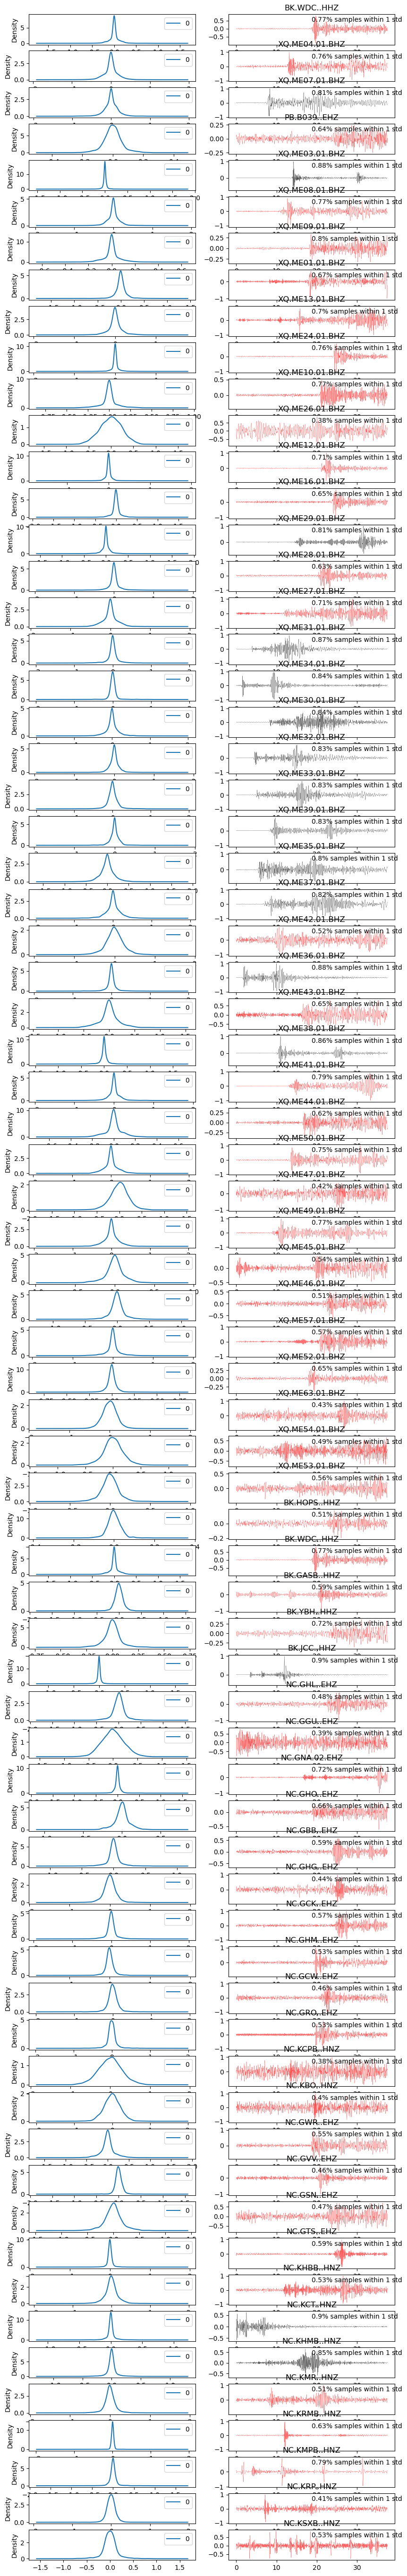

In [35]:
mseed_dir = '../data/eq_data/2_waveforms'
mseed_list = [f for f in os.listdir(mseed_dir) if f.endswith('.mseed')]
st = obspy.read(f'{mseed_dir}/{mseed_list[0]}')
st = st.resample(100).detrend('demean').filter('bandpass', freqmin=1.5, freqmax=10, corners=4, zerophase=True)

fig, ax = plt.subplots(len(st), 2, figsize=(10, len(st)*1))
for i, tr in enumerate(st):
    tr.data = tr.data / np.max(np.abs(tr.data))
    ax[i,1].set_title(tr.id)

    # how many samples within 1 std
    std = np.std(tr.data)
    n = np.sum(np.abs(tr.data) < 0.5 * std)/len(tr.data)
    ax[i,1].text(0.5, .75, f'{n.round(2)}% samples within 1 std', transform=ax[i,1].transAxes)
    
    #
    beg = int(0.25 * len(tr.data))
    end = int(0.50 * len(tr.data))
    tr.data = tr.data[beg:end]
    ax[i,1].plot(tr.times(), tr.data, lw=0.2, color='k' if n > .8 else 'r')

    # plot density
    pd.DataFrame(tr.data).plot(kind='density', ax=ax[i,0])

    # if i ==5:
    #     break

### signal processing:
0.5 std spread: if this is covered by >75% of the samples in a trace, it can identify the noisy  samples that might not be good for ML picking. It seems to be very successfull within `75-80%` coverage area.

Text(0, 0.5, 'Number of picks')

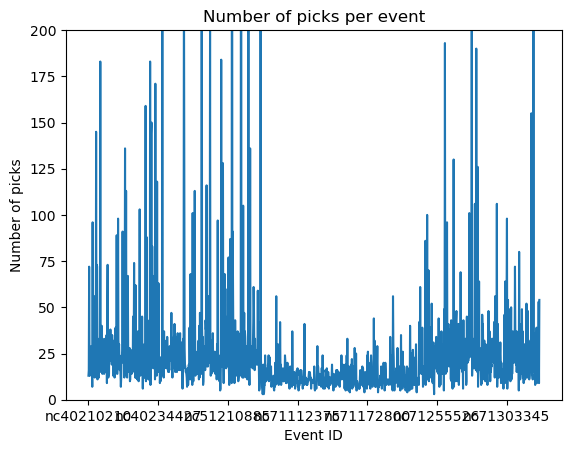

In [17]:
TotalEventsPickedNCEDC = master_df.event_id.unique().shape[0]
AvgPicksPerEventNCEDC = master_df.shape[0] / TotalEventsPickedNCEDC

npicks_series = master_df.groupby('event_id').size()
ax = npicks_series.plot()
ax.set_title('Number of picks per event')
ax.set_ylim(0, 200)
ax.set_xlabel('Event ID')
ax.set_ylabel('Number of picks')